# Flower Classifier
## Setting up the environment

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Drive not mounted, so nothing to flush and unmount.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Download data

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
folders_files = [('sunflowers', 'sunflowers.csv'), ('yellow_daisy', 'yellow_daisy.csv'), ('yellow_tulips', 'yellow_tulips.csv')]
for (folder, file) in folders_files:
  path = Path('/content/gdrive/My Drive/DeepLearning/Datasets/')
  folder = (path/folder)
  folder.mkdir(parents=True, exist_ok=True)
  download_images(path/file, folder, max_pics=200)
  verify_images(folder, delete=True, max_size=500)

## View data

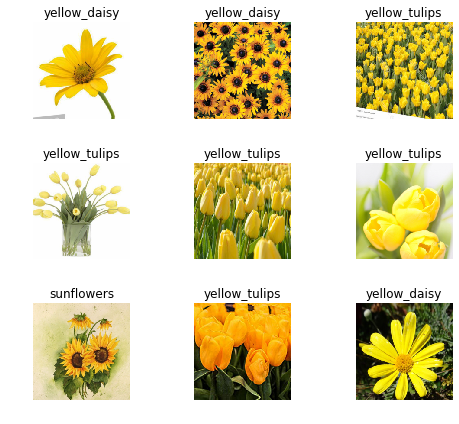

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

## Clean data 

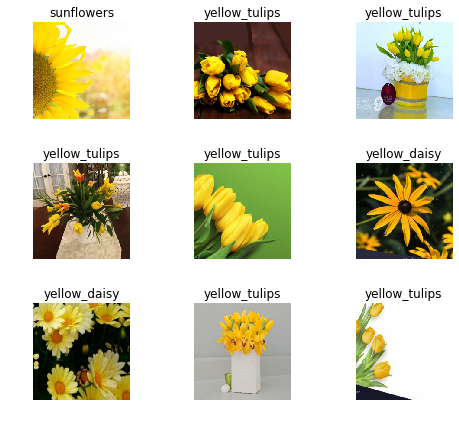

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['sunflowers', 'yellow_daisy', 'yellow_tulips'], 3, 924, 231)

## Train model

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 109355856.48it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.890968,0.387459,0.138528,00:28
1,0.527052,0.283305,0.064935,00:18
2,0.378353,0.281448,0.064935,00:18
3,0.282371,0.271847,0.060606,00:18


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [12]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


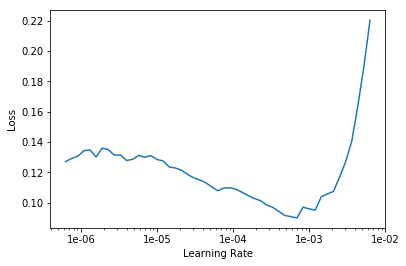

In [14]:
learn.fit_one_cycle(10, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.133750,0.250481,0.056277,00:18
1,0.094298,0.215684,0.038961,00:19
2,0.068966,0.253927,0.038961,00:19
3,0.052962,0.270199,0.034632,00:18
4,0.039442,0.250920,0.034632,00:19
5,0.032108,0.251597,0.034632,00:18
6,0.028615,0.254128,0.034632,00:19
7,0.022683,0.250784,0.034632,00:19
8,0.018629,0.257523,0.034632,00:18
9,0.015092,0.253845,0.034632,00:18


In [0]:
learn.save('stage-2')

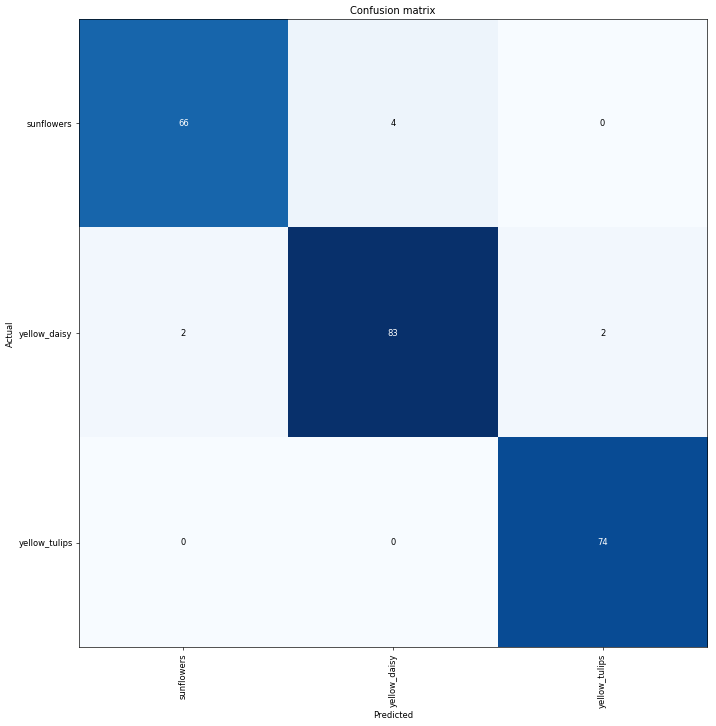

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

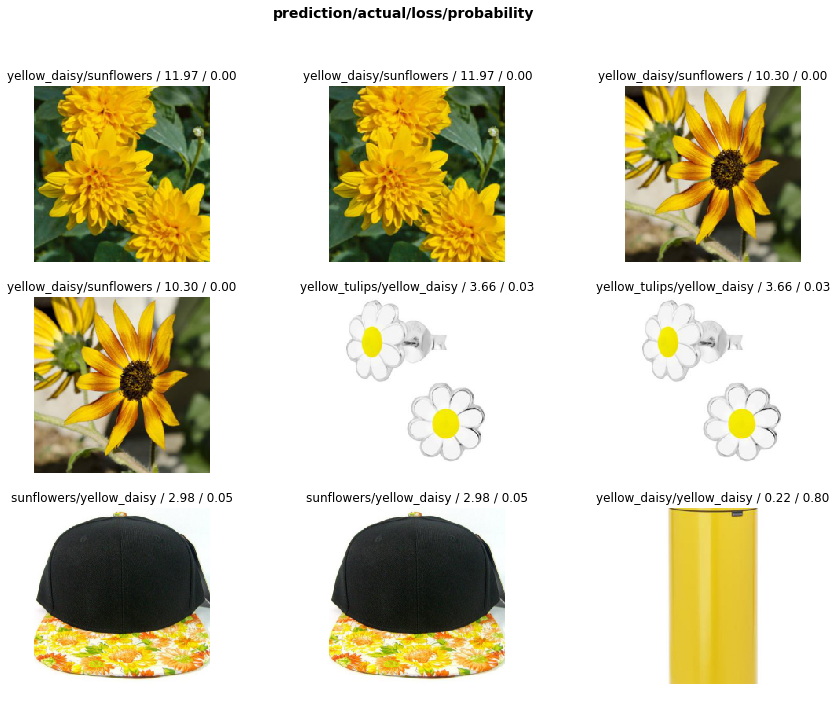

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

## Export the model to production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

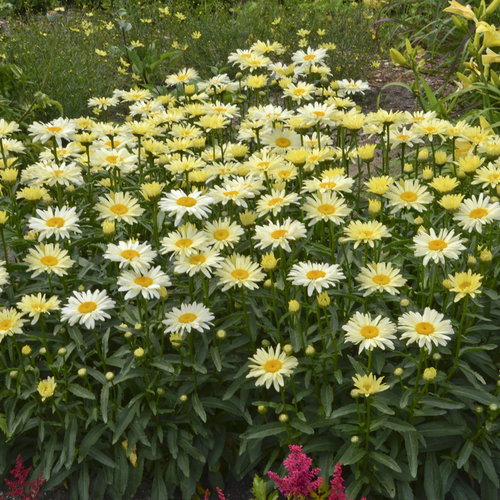

In [20]:
img = open_image(path/'yellow_daisy'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [22]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category yellow_daisy